In [11]:
!pip install pandas_datareader

In [3]:
pip install yfinance

  Using cached yfinance-0.1.70-py2.py3-none-any.whl (26 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached lxml-4.8.0-cp37-cp37m-win_amd64.whl (3.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.22.0
    Uninstalling requests-2.22.0:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 액세스가 거부되었습니다: 'c:\\programdata\\anaconda3\\lib\\site-packages\\requests-2.22.0.dist-info\\INSTALLER'
Consider using the `--user` option or check the permissions.



In [21]:
cd ..

C:\Users\김승환\PycharmProjects\Python_Project


In [12]:
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
import pandas as pd
yfin.pdr_override()
#import all stocks name
df = pd.read_csv('https://pkgstore.datahub.io/core/nyse-other-listings/nyse-listed_csv/data/3c88fab8ec158c3cd55145243fe5fcdf/nyse-listed_csv.csv')
df = df['ACT Symbol']
#m = len(df)
m = 20
prob = []
prob_2 = []
#Save Close and name of equity that satisfies the condition
close = []
stock = []

for j in range(m):
  start_date = '2022-01-01'
  end_date = '2022-03-11'
  df_Stock = pdr.get_data_yahoo(df[j], start = start_date, end = end_date)
  price = df_Stock['Close']
  n = len(price)
  price = price.to_numpy()
  price = np.reshape(price,n)
  price_limit = 70 #dollars

  #For index error
  try:
    if price[-1]*price[-2] > 0 and price[-1] < price_limit:
      #If the theorem is right, go to true box, otherwise go to false box
      true_box = []
      false_box = []
      #for ZeroDivision error
      try:
        true_val = 0
        false_val = 0
        for i in range(n):
          #Index error
          try:
            #t-2 is the day before yesterday, t-1 is yesterday, and t-0 is today
            t_2 = price[i] - price[i+1]
            t_1 = price[i+2] - price[i+1]
            mul_12 = (t_2)*(t_2)
            t_0 = price[i+3] - price[i+2]
            if mul_12 > 0:
              if t_0 > 0:
                true_val += 1
              else:
                false_val += 1
            elif mul_12 < 0:
              if t_0 < 0:
                true_val += 1
              else:
                false_val += 1
          except IndexError:
            break
        Probability = true_val/(true_val + false_val)
      except ZeroDivisionError:
        continue
      if Probability > 0.5:
        stock.append(df[j])
        close.append(price[-1])
        prob.append(Probability)
        k = round((j+1)*100/m,2)
        print(k,'%')
  except IndexError:
    continue
df_PotenStock = pd.DataFrame({'Stock': stock, 'Close': close, 'Prob': prob})
df_PotenStock
#file_name = input("Decide your csv file name ")
#df_PotenStock.to_csv(file_name)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AA$B: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAV: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[********************

,Stock,Close,Prob
0,ABEV,2.670000,0.534884
1,ABM,46.049999,0.622222


In [4]:
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
import pandas as pd
yfin.pdr_override()
#import all stocks name
df = pd.read_csv('https://pkgstore.datahub.io/core/nyse-other-listings/nyse-listed_csv/data/3c88fab8ec158c3cd55145243fe5fcdf/nyse-listed_csv.csv')
df = df['ACT Symbol']
#m = len(df)
m = 30
prob = []
prob_2 = []
#Save Close and name of equity that satisfies the condition
close = []
stock = []

for j in range(m):
  start_date = '2022-01-01'
  end_date = '2022-03-11'
  df_Stock = pdr.get_data_yahoo(df[j], start = start_date, end = end_date)
  price = df_Stock['Close']
  n = len(price)
  price = price.to_numpy()
  price = np.reshape(price,n)
  price_limit = 70 #dollars

  #For index error
  try:
    if price[-1]*price[-2] > 0 and price[-1] < price_limit:
      #If the theorem is right, go to true box, otherwise go to false box
      true_box = []
      false_box = []
      #for ZeroDivision error
      try:
        true_val = 0
        false_val = 0
        for i in range(n):
          #Index error
          try:
            #t-2 is the day before yesterday, t-1 is yesterday, and t-0 is today
            t_2 = price[i] - price[i+1]
            t_1 = price[i+2] - price[i+1]
            mul_12 = (t_2)*(t_2)
            t_0 = price[i+3] - price[i+2]
            if mul_12 > 0:
              if t_0 > 0:
                true_val += 1
              else:
                false_val += 1
            elif mul_12 < 0:
              if t_0 < 0:
                true_val += 1
              else:
                false_val += 1
          except IndexError:
            break
        Probability = true_val/(true_val + false_val)
      except ZeroDivisionError:
        continue
      if Probability > 0.5:
        stock.append(df[j])
        close.append(price[-1])
        prob.append((Probability*100 - 50)**(3/2))
        k = round((j+1)*100/m,2)
        print(k,'%')
  except IndexError:
    continue
df_PotenStock = pd.DataFrame({'Stock': stock, 'Close': close, 'Value': prob})
df_PotenStock
#file_name = input("Decide your csv file name ")
#df_PotenStock.to_csv(file_name)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AA$B: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAV: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[********************

,Stock,Close,Value
0,ABEV,2.670000,6.515297
1,ABM,46.049999,42.729249
2,ACH,15.870000,9.690942
3,ACI,34.580002,17.803397


In [5]:
class Stock(object):
  def __init__(self, n, v, w):
    self.name = n
    self.values = v
    self.prices = w

  def getName(self):
    return self.name

  def getValue(self):
    return self.values

  def getCost(self):
    return self.prices

  def density(self):
    return self.getValue()/self.getCost()

  def __str__(self):
    return (self.name + ': <' + str(round(self.values,3)) + ', ' + str(round(self.prices,1)) + '$' + '>')

def buildMenu(names, values, prices):
  menu = []
  for i in range(len(values)):
    menu.append(Stock(names[i], values[i], prices[i]))
  return menu

def maxVal_fast(toConsider, avail, memo = {}):
  """Assume toConsider a list of items, avail a weight
  Returns a tuple of the total value of a solution to 0/1 knapsack problem
  and the items of that solution"""
  if (len(toConsider), avail) in memo:
    return memo[(len(toConsider), avail)]

  elif toConsider == [] or avail == []:
    result = (0, ())
  elif toConsider[0].getCost() > avail:
    #Explore right branch only
    result = maxVal_fast(toConsider[1:], avail)
  else:
    nextItem = toConsider[0]
    #Explore left branch
    withVal, withToTake = maxVal_fast(toConsider[1:],
                                avail - nextItem.getCost())
    withVal += nextItem.getValue()
    #Explore right branch
    withoutVal, withoutToTake = maxVal_fast(toConsider[1:], avail)

    #Choose better branch
    if withVal > withoutVal:
      result = (withVal, withToTake + (nextItem,))
    else:
      result = (withoutVal, withoutToTake)
  memo[(len(toConsider), avail)] = result
  return result

def testmaxVal_fast(stocks, maxUnits, printItems = True):
  import numpy as np
  choosen = []
  print('Use search tree to allocate ' + str(maxUnits) + '$')
  val, taken = maxVal_fast(stocks, maxUnits)
  m = len(taken)
  print('Total Values are ' + str(round(val,1)))
  if printItems:
    for item in taken:
      choosen.append(item.getName())
      print('> ', item)
  return choosen

In [6]:
import pandas as pd
df_PotenStock
names = df_PotenStock['Stock']
prices = df_PotenStock['Close']
values = df_PotenStock['Value']
stocks = buildMenu(names, values, prices)
choosen = testmaxVal_fast(stocks, 100, True)
choosen

Use search tree to allocate 100$
Total Values are 76.7
>  ACI: <17.803, 34.6$>
>  ACH: <9.691, 15.9$>
>  ABM: <42.729, 46.0$>
>  ABEV: <6.515, 2.7$>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


['ACI', 'ACH', 'ABM', 'ABEV']

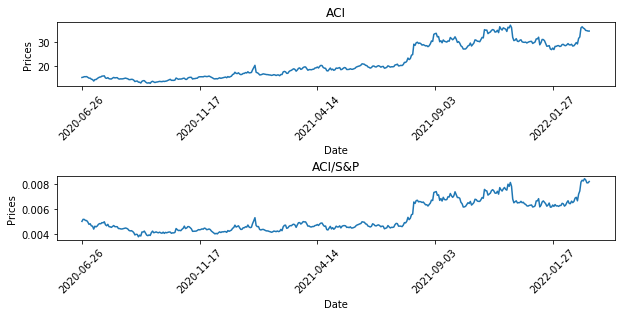

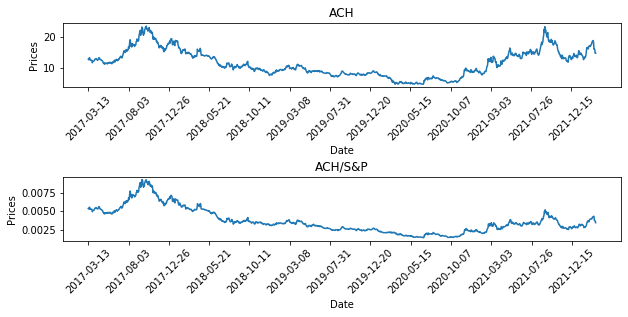

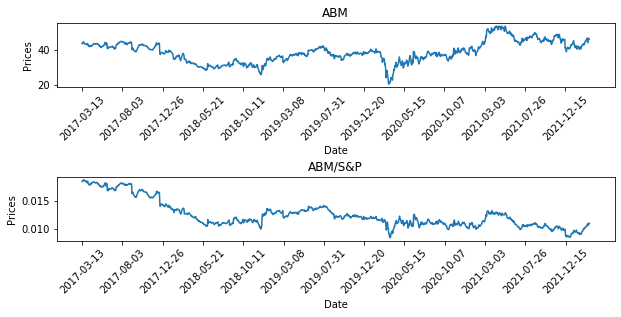

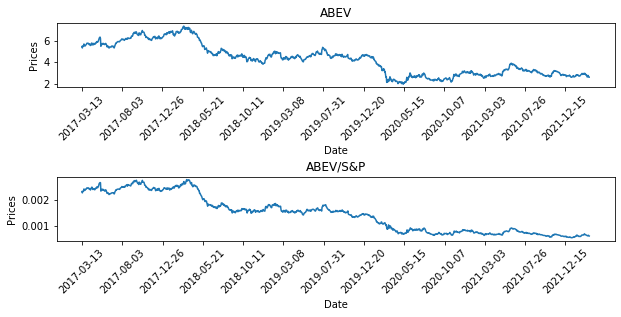

In [7]:
import yfinance as yfin
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema
yfin.pdr_override()
n = len(choosen)
df_stock = pd.DataFrame()
maximum_stock = []
maximum_RS = []
maximum_stock_x = []
maximum_RS_x = []
for i in range(n):
  #Get Stock Data and do some make them useful
  df_stock = pdr.get_data_yahoo(choosen[i])
  df_stock = df_stock.reset_index()
  m = len(df_stock)
  date = df_stock['Date']
  date = date.dt.strftime('%Y-%m-%d')
  date = date.to_numpy()
  date = np.reshape(date,m)
  df_SP = pdr.get_data_yahoo('^GSPC', start = date[0])
  df_SP = df_SP.reset_index()
  df_SP = df_SP[:-1]
  close_stock = df_stock['Close']
  close_SP = df_SP['Close']

  #Make RS
  close_RS = close_stock/close_SP

  #Make x data
  x_date = np.linspace(0,m,m)

  #Plot
  plt.figure(figsize = (10,4))
  plt.subplot(3,1,1)
  plt.plot(x_date, close_stock)
  plt.xlabel('Date')
  plt.ylabel('Prices')
  plt.title(choosen[i])
  plt.xticks(x_date[::100], date[::100], rotation = 45)

  plt.subplot(3,1,3)
  plt.plot(x_date, close_RS)
  plt.xlabel('Date')
  plt.ylabel('Prices')
  plt.title(str(choosen[i]) + '/' + 'S&P')
  plt.xticks(x_date[::100], date[::100], rotation = 45)

In [56]:
import yfinance as yfin
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema
maximum_stock = []
maximum_RS = []
maximum_stock_x = []
maximum_RS_x = []
stock = []
rs = []
n = len(choosen)
for i in range(n):
  #Get the wanted data
  df_stock = pdr.get_data_yahoo(choosen[i])
  df_stock = pdr.get_data_yahoo(choosen[i])
  df_stock = df_stock.reset_index()
  m = len(df_stock)
  date = df_stock['Date']
  date = date.dt.strftime('%Y-%m-%d')
  date = date.to_numpy()
  date = np.reshape(date,m)
  df_SP = pdr.get_data_yahoo('^GSPC', start = date[0])
  df_SP = df_SP.reset_index()
  df_SP = df_SP[:-1]
  close_stock = df_stock['Close']
  close_SP = df_SP['Close']

  #Make RS
  close_RS = close_stock/close_SP

  #make the pandas of the numpy
  close_stock = np.reshape(close_stock.to_numpy(),m)
  close_RS = np.reshape(close_RS.to_numpy(),m)

  #Get the maximum value
  maximum_stock_x = argrelextrema(close_stock, np.greater)
  maximum_RS_x = argrelextrema(close_RS, np.greater)
  l = len(maximum_stock_x)
  h = len(maximum_RS_x)
  for j in range(l):
    maximum_stock = close_stock[maximum_stock_x[j]]
    #now Progress the deviation of maximum value
  for k in range(h):
    maximum_RS = close_RS[maximum_RS_x[j]]
maximum_stock

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:77: RuntimeWarning: invalid value encountered in greater
  results &= comparator(main, plus)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:78: RuntimeWarning: invalid value encountered in greater
  results &= comparator(main, minus)


array([5.53000021, 5.71000004, 5.78999996, 5.78000021, 5.71000004,
       5.63000011, 5.80000019, 5.78000021, 5.86000013, 5.94000006,
       6.36000013, 5.65999985, 5.76000023, 5.76999998, 5.76999998,
       5.51999998, 5.4000001 , 5.48999977, 5.51999998, 5.48999977,
       5.48999977, 5.78000021, 6.19000006, 6.15999985, 6.23000002,
       6.23000002, 6.28999996, 6.25      , 6.26000023, 6.46000004,
       6.80999994, 6.82000017, 6.8499999 , 6.59000015, 6.76000023,
       6.98000002, 6.53000021, 6.38999987, 6.23999977, 6.17999983,
       6.4000001 , 6.42999983, 6.34000015, 6.3499999 , 6.46999979,
       6.30999994, 6.6500001 , 6.67000008, 6.76999998, 6.78000021,
       6.86000013, 6.86999989, 6.9000001 , 6.94999981, 6.65999985,
       6.67999983, 6.82000017, 6.82000017, 7.07000017, 7.30000019,
       7.38999987, 7.17000008, 7.26000023, 7.19999981, 7.26999998,
       7.21000004, 7.        , 6.88999987, 6.69999981, 6.0999999 ,
       5.51999998, 5.55000019, 5.34000015, 5.09000015, 5.01000

In [24]:
# We have maximum_rs and maximum_rs_x and stock as well.
maximum_stock_x = list(maximum_stock_x)
maximum_RS_x = list(maximum_RS_x)
maximum_stock_x =  maximum_stock_x[0]
maximum_RS_x = maximum_RS_x[0]

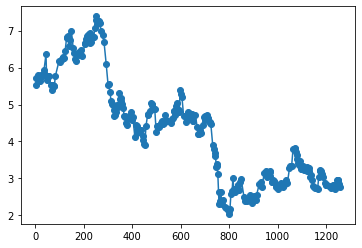

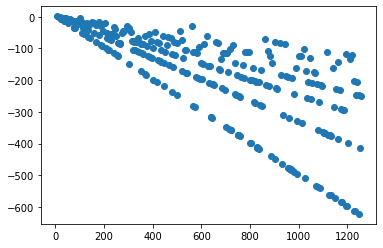

In [54]:
import matplotlib.pyplot as plt
n = len(maximum_RS_x)
m = len(maximum_stock_x)
plt.plot(maximum_stock_x,maximum_stock, '-o')
plt.show()
dev_stock = []
dev_RS = []
for i in range(m):
  try:
    dev_stock.append((maximum_stock[i+1] - maximum_stock_x[i])/(maximum_stock_x[i+1] - maximum_stock_x[i]))
  except IndexError:
    break
for j in range(n):
  try:
    dev_RS.append((maximum_RS[j+1] - maximum_RS[j])/(maximum_RS_x[j+1] - maximum_RS_x[j]))
  except IndexError:
    break
plt.plot(maximum_stock_x[1:],dev_stock, 'o')

In [32]:
%whos

Variable                        Type         Data/Info
------------------------------------------------------
DataFrame                       type         <class 'pandas.core.frame.DataFrame'>
MultiIndex                      type         <class 'pandas.core.indexes.multi.MultiIndex'>
Probability                     float        0.5681818181818182
Stock                           type         <class '__main__.Stock'>
argrelextrema                   function     <function argrelextrema at 0x0000013D78E97F78>
buildMenu                       function     <function buildMenu at 0x0000013D73A85708>
choosen                         list         n=4
close                           list         n=4
close_RS                        ndarray      1261: 1261 elems, type `float64`, 10088 bytes
close_SP                        Series       0       2373.469971\n1   <...>gth: 1260, dtype: float64
close_stock                     ndarray      1261: 1261 elems, type `float64`, 10088 bytes
date                

In [2]:
import yfinance

In [3]:
choosen

NameError: name 'choosen' is not defined